# Media Sentiment Analysis

-  The first plot is not extremely useful for finding trends, there are too many overlapping datapoints to see anything but the  fact that all of the media outlets have large variance in compound sentiment.
-  Average Sentiment gives a much clearer picture of tweet polarity, with BBC having the most positive polarity and CBS having the most negative polarity.
-  The maximum negative polarity is only -0.075, while the maximum positive polarity is 0.100.  This indicates that even the most negative news sources are only slightly negative.

In [ ]:
#import dependencies
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
import numpy as np
#setup API authorization
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
#set target twitter accounts, declare sentiment list
sentiment_list = []
target_accounts = ["@CBSNews", "@BBC" , "@CNN" , "@FoxNews" , "@nytimes"]
#loop through each account
for account in target_accounts:
    #blank out tweet counter and oldest tweet at the start of each new account loop
    
    counter = 1
    oldest_tweet = None
    
    #loop through 5 pages of 20 tweets each for 100 total
    for x in range(5):
        public_tweets = api.user_timeline(account, max_id=oldest_tweet)
        #loop through each tweet
        for tweet in public_tweets:
            #do sentiment analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            oldest_tweet = tweet['id'] - 1
            sentiment_list.append({"User": account, "Date": tweet["created_at"], "Text":tweet["text"], 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})
            counter+=1
        

In [22]:
#construct dataframe from sentiment data, make separate dataframes for each user
sentiment_df = pd.DataFrame.from_dict(sentiment_list)
sentiment_df = sentiment_df[["User", "Date", "Compound", "Positive", "Negative", "Neutral", "Text", "Tweets Ago"]]
CBS_df = sentiment_df[sentiment_df["User"] == "@CBSNews"]
BBC_df = sentiment_df[sentiment_df["User"] == "@BBC"]
CNN_df = sentiment_df[sentiment_df["User"] == "@CNN"]
Fox_df = sentiment_df[sentiment_df["User"] == "@FoxNews"]
nyt_df = sentiment_df[sentiment_df["User"] == "@nytimes"]
sentiment_df.head()

,User,Date,Compound,Positive,Negative,Neutral,Text,Tweets Ago
0,@CBSNews,Sat Jun 09 15:10:07 +0000 2018,0.0000,0.000,1.000,0.000,WATCH: Take a look at how the coastline of Haw...,1
1,@CBSNews,Sat Jun 09 14:49:49 +0000 2018,-0.7096,0.103,0.608,0.289,4 U.S. service members who were wounded in an ...,2
2,@CBSNews,Sat Jun 09 14:39:43 +0000 2018,-0.0772,0.000,0.944,0.056,Reporter: How long do you think it will take y...,3
3,@CBSNews,Sat Jun 09 14:36:02 +0000 2018,0.0000,0.000,1.000,0.000,President Trump says the U.S. relationship wit...,4
4,@CBSNews,Sat Jun 09 14:31:24 +0000 2018,0.0000,0.000,1.000,0.000,"""You know, Obama can say all he wants, but he ...",5


# Sentiment Analysis of Media Tweets

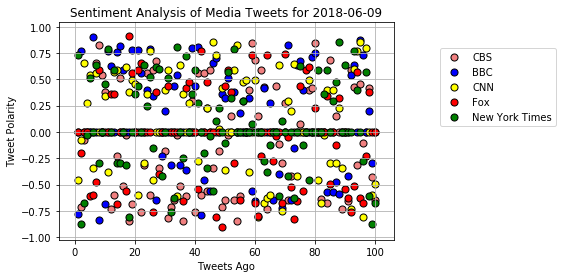

In [26]:
#construct scatter plot of compound sentiment for each df
plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound"], marker='o', facecolors="lightcoral", edgecolors="black", label="CBS", s=50)
plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound"], marker='o', facecolors="blue", edgecolors="black", label="BBC", s=50)
plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound"], marker='o', facecolors="yellow", edgecolors="black", label="CNN", s=50)
plt.scatter(Fox_df["Tweets Ago"], Fox_df["Compound"], marker='o', facecolors="red", edgecolors="black", label="Fox", s=50)
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], marker='o', facecolors="green", edgecolors="black", label="New York Times" , s=50)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1.5, .5), loc="lower right")
plt.grid()
date = datetime.today().strftime('%Y-%m-%d')
plt.title(f"Sentiment Analysis of Media Tweets for {date}")
plt.savefig("Sentiment_Analysis1")
plt.show()


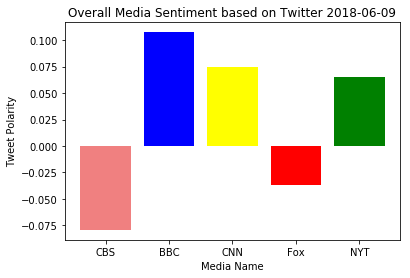

In [25]:
#construct bar graph of average compound sentiment
x_axis = np.arange(0, len(target_accounts))
label_list = ["CBS", "BBC", "CNN", "Fox", "NYT"]
y_axis = [CBS_df["Compound"].mean(), BBC_df["Compound"].mean(), CNN_df["Compound"].mean(), Fox_df["Compound"].mean(),
          nyt_df["Compound"].mean()]
tick_locations = []
for tick in x_axis:
    tick_locations.append(tick)
plt.bar(x_axis, y_axis, color=["lightcoral", "blue", "yellow", "red", "green"], align="center")
plt.xticks(tick_locations, label_list)
plt.xlabel("Media Name")
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.savefig("Sentiment_Analysis2")
plt.show()
